## Análisis y Visualización de Resultados de Simulación

### Objetivo
Este código se encarga de analizar y visualizar los resultados de simulaciones de redes LoRa, donde se evalúa la transmisión de paquetes entre nodos y su recepción en una estación base. Los resultados incluyen la cantidad de paquetes enviados, la cantidad de paquetes perdidos, colisiones, procesados y recibidos.

### Proceso
1. **Simulación:**
   - Se realiza la simulación de la red LoRa con diferentes configuraciones, generando archivos de registro por cada ejecución.
   - Cada archivo de registro contiene información sobre cada paquete, indicando si fue perdido, colisionó, procesado o recibido.

2. **Análisis de Resultados:**
   - Se utiliza un script para analizar los archivos de registro y calcular estadísticas clave, como la cantidad total de paquetes enviados, perdidos, colisionados, etc.
   - Estos resultados se almacenan en un archivo CSV llamado `test_result.csv` con detalles sobre cada ejecución de simulación.

3. **Visualización:**
   - Se utiliza un script adicional para cargar y visualizar los resultados en un gráfico lineal.
   - El gráfico muestra la cantidad de paquetes perdidos, colisionados, no procesados, extraídos y nodos que no alcanzaron el beacon a lo largo de las ejecuciones.

### Herramientas Utilizadas
- Python (matplotlib, csv, os): Para análisis y visualización de datos.
- Jupyter Notebook: Para ejecutar y visualizar el código interactivo.

### Resultados
Los resultados de la simulación se presentan de manera gráfica, facilitando la interpretación y comparación de diferentes configuraciones de red LoRa.


C:\Users\GoodGame\AppData\Local\Temp\ipykernel_9572\722331775.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


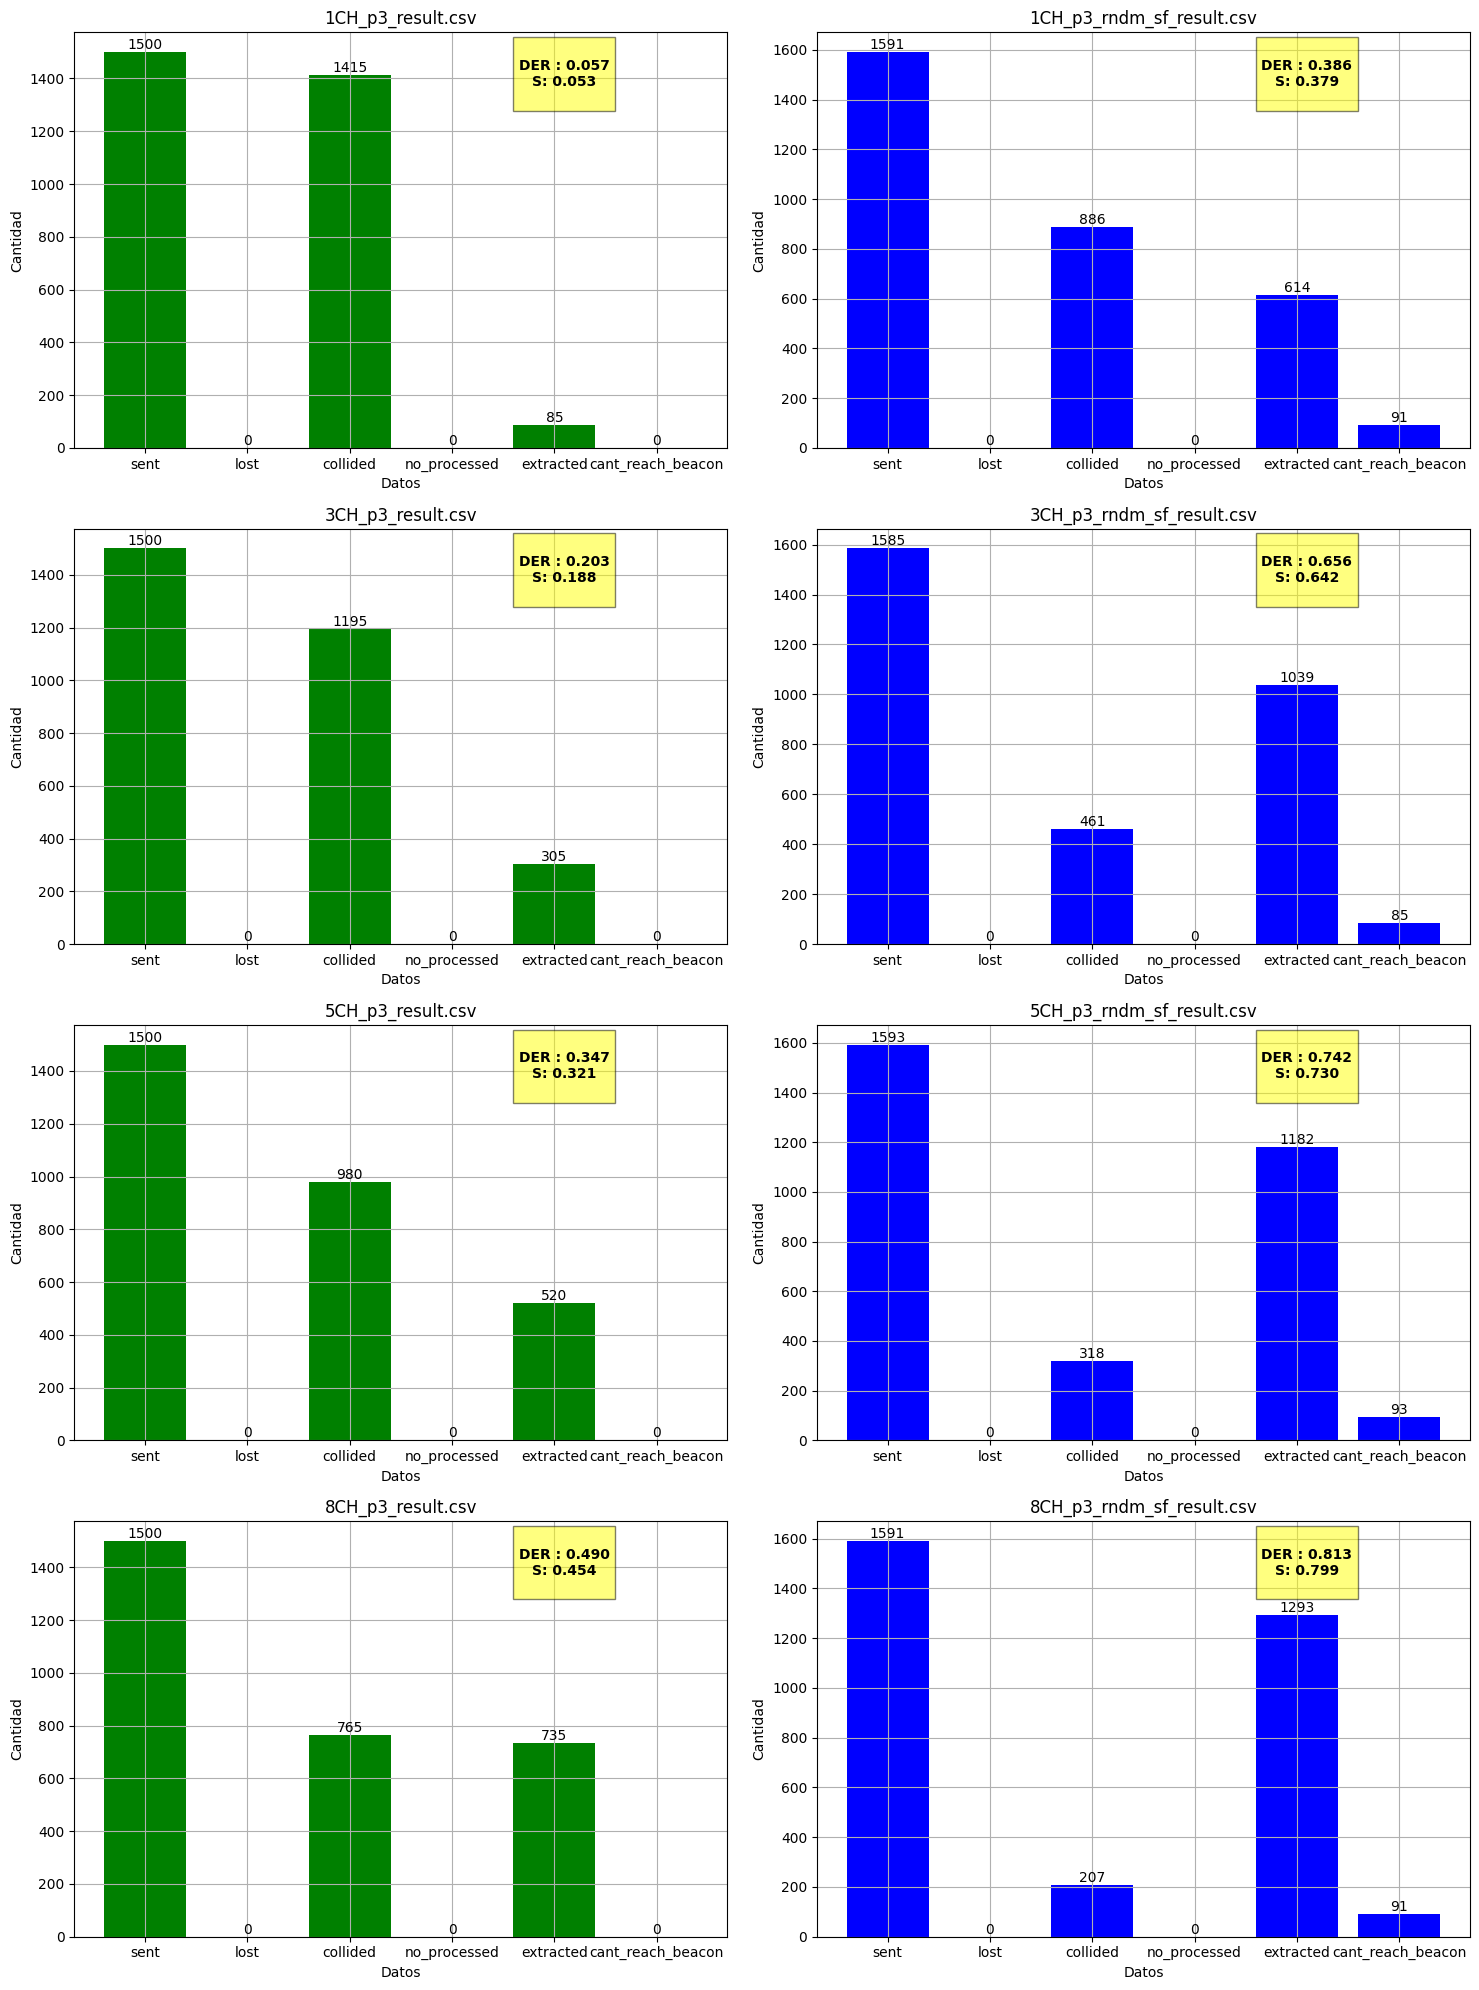

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def procesar_y_graficar(ax, nombre_archivo_resultados, color):
    # Crear DataFrames a partir del archivo CSV, excluyendo la última fila y las columnas no numéricas
    columnas_numericas = ["sent", "lost", "collided", "no_processed", "extracted", "cant_reach_beacon"]
    columna_porcen = ["percentage_extracted"]

    df_resultados = pd.read_csv(nombre_archivo_resultados)
    df_porcen = df_resultados[columna_porcen].apply(pd.to_numeric, errors='coerce')
    df_resultados = df_resultados[columnas_numericas].apply(pd.to_numeric, errors='coerce')

    # Calcular promedios y mostrar diccionario de promedios
    promedios_dict = {columna: round(promedio) for columna, promedio in zip(df_resultados.columns, df_resultados.mean())}
    promedios_porcen = {col_porcen: prom_porcen for col_porcen, prom_porcen in zip(df_porcen.columns, df_porcen.mean())}

    # Visualización gráfica
    bars = ax.bar(promedios_dict.keys(), promedios_dict.values(), color=color)
    ax.bar_label(bars, label_type='edge', color='black', fontsize=10)
    promedio_percentage_extracted = promedios_porcen["percentage_extracted"]
    #ax.text(0.75, 0.9, f"Promedio de percentage_extracted: \n{promedio_percentage_extracted:.2f}%", ha='center', va='center', transform=ax.transAxes, bbox=dict(facecolor='grey', alpha=0.5), fontweight='bold')
    ax.set_title(f'{nombre_archivo_resultados}')
    ax.set_xlabel('Datos')
    ax.set_ylabel('Cantidad')
    ax.grid(True)

    # Estadísticas adicionales
    der_sim = promedios_dict["extracted"] / promedios_dict["sent"]
    S_sim = (promedios_dict["extracted"] * 0.741376) / 1200

    stats_text = (
        f"\nDER : {der_sim:.3f}\n"
        f"S: {S_sim:.3f}\n"
    )
    ax.text(0.75, 0.9, stats_text, ha='center', va='center', transform=ax.transAxes, bbox=dict(facecolor='yellow', alpha=0.5), fontweight='bold')

# Nombre de los archivos de resultados
archivos_resultados = ["1CH_p3_result.csv", "1CH_p3_rndm_sf_result.csv", "3CH_p3_result.csv", "3CH_p3_rndm_sf_result.csv",
                       "5CH_p3_result.csv", "5CH_p3_rndm_sf_result.csv", "8CH_p3_result.csv", "8CH_p3_rndm_sf_result.csv"]

# Configurar subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Procesar y graficar cada archivo
for i, archivo in enumerate(archivos_resultados):
    color = 'green' if i % 2 == 0 else 'blue'
    procesar_y_graficar(axs[i // 2, i % 2], archivo, color)

plt.tight_layout()
plt.show()


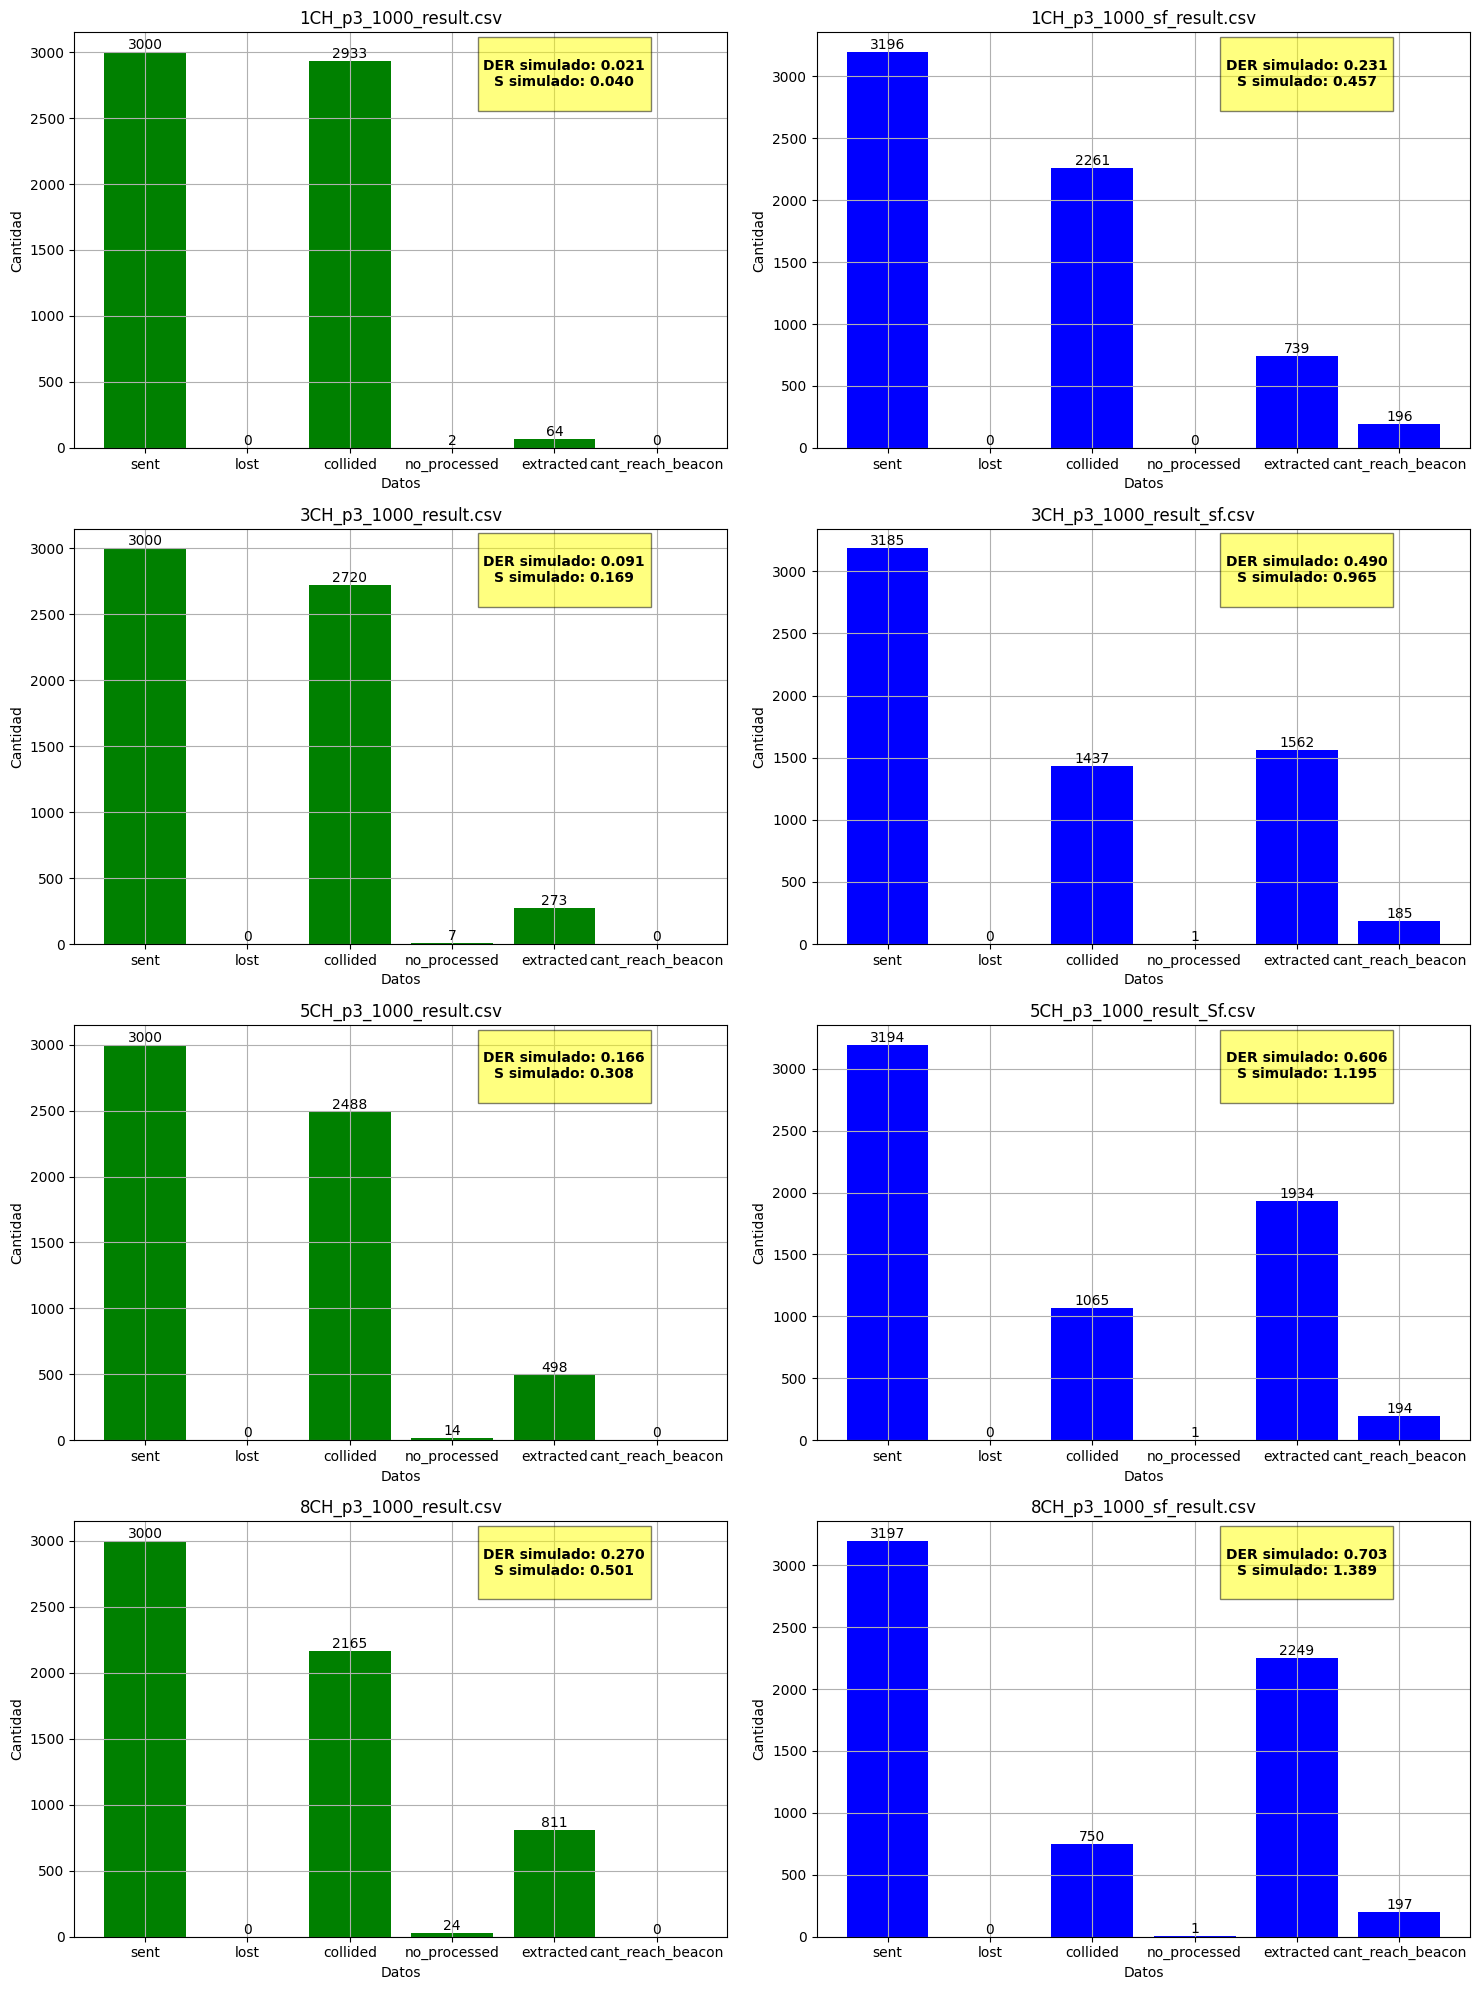

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def procesar_y_graficar(ax, nombre_archivo_resultados, color):
    # Crear DataFrames a partir del archivo CSV, excluyendo la última fila y las columnas no numéricas
    columnas_numericas = ["sent", "lost", "collided", "no_processed", "extracted", "cant_reach_beacon"]
    columna_porcen = ["percentage_extracted"]

    df_resultados = pd.read_csv(nombre_archivo_resultados)
    df_porcen = df_resultados[columna_porcen].apply(pd.to_numeric, errors='coerce')
    df_resultados = df_resultados[columnas_numericas].apply(pd.to_numeric, errors='coerce')

    # Calcular promedios y mostrar diccionario de promedios
    promedios_dict = {columna: round(promedio) for columna, promedio in zip(df_resultados.columns, df_resultados.mean())}
    promedios_porcen = {col_porcen: prom_porcen for col_porcen, prom_porcen in zip(df_porcen.columns, df_porcen.mean())}

    # Visualización gráfica
    bars = ax.bar(promedios_dict.keys(), promedios_dict.values(), color=color)
    ax.bar_label(bars, label_type='edge', color='black', fontsize=10)
    promedio_percentage_extracted = promedios_porcen["percentage_extracted"]
   # ax.text(0.75, 0.9, f"DER: {promedio_percentage_extracted/100:.2f}", ha='center', va='center', transform=ax.transAxes, bbox=dict(facecolor='grey', alpha=0.5), fontweight='bold')
    ax.set_title(f'{nombre_archivo_resultados}')
    ax.set_xlabel('Datos')
    ax.set_ylabel('Cantidad')
    ax.grid(True)

    # Estadísticas adicionales
    der_sim = promedios_dict["extracted"] / promedios_dict["sent"]
    S_sim = (promedios_dict["extracted"] * 0.741376) / 1200

    stats_text = (
        f"\nDER simulado: {der_sim:.3f}\n"
        f"S simulado: {S_sim:.3f}\n"
    )
    ax.text(0.75, 0.9, stats_text, ha='center', va='center', transform=ax.transAxes, bbox=dict(facecolor='yellow', alpha=0.5), fontweight='bold')

# Nombre de los archivos de resultados
archivos_resultados = ["1CH_p3_1000_result.csv", "1CH_p3_1000_sf_result.csv", "3CH_p3_1000_result.csv", "3CH_p3_1000_result_sf.csv",
                       "5CH_p3_1000_result.csv", "5CH_p3_1000_result_Sf.csv", "8CH_p3_1000_result.csv", "8CH_p3_1000_sf_result.csv"]

# Configurar subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Procesar y graficar cada archivo
for i, archivo in enumerate(archivos_resultados):
    color = 'green' if i % 2 == 0 else 'blue'
    procesar_y_graficar(axs[i // 2, i % 2], archivo, color)

plt.tight_layout()
plt.show()


C:\Users\GoodGame\AppData\Local\Temp\ipykernel_20228\598544249.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_der.show()
C:\Users\GoodGame\AppData\Local\Temp\ipykernel_20228\598544249.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_s.show()
C:\Users\GoodGame\AppData\Local\Temp\ipykernel_20228\598544249.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_der.show()
C:\Users\GoodGame\AppData\Local\Temp\ipykernel_20228\598544249.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_s.show()
C:\Users\GoodGame\AppData\Local\Temp\ipykernel_20228\598544249.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_der.show()
C:\Users\GoodGame\AppData\Local\Temp\ipykernel_20228\598544249.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_s.show()
C:\Users\GoodGame\AppData\Local\Temp\ipy

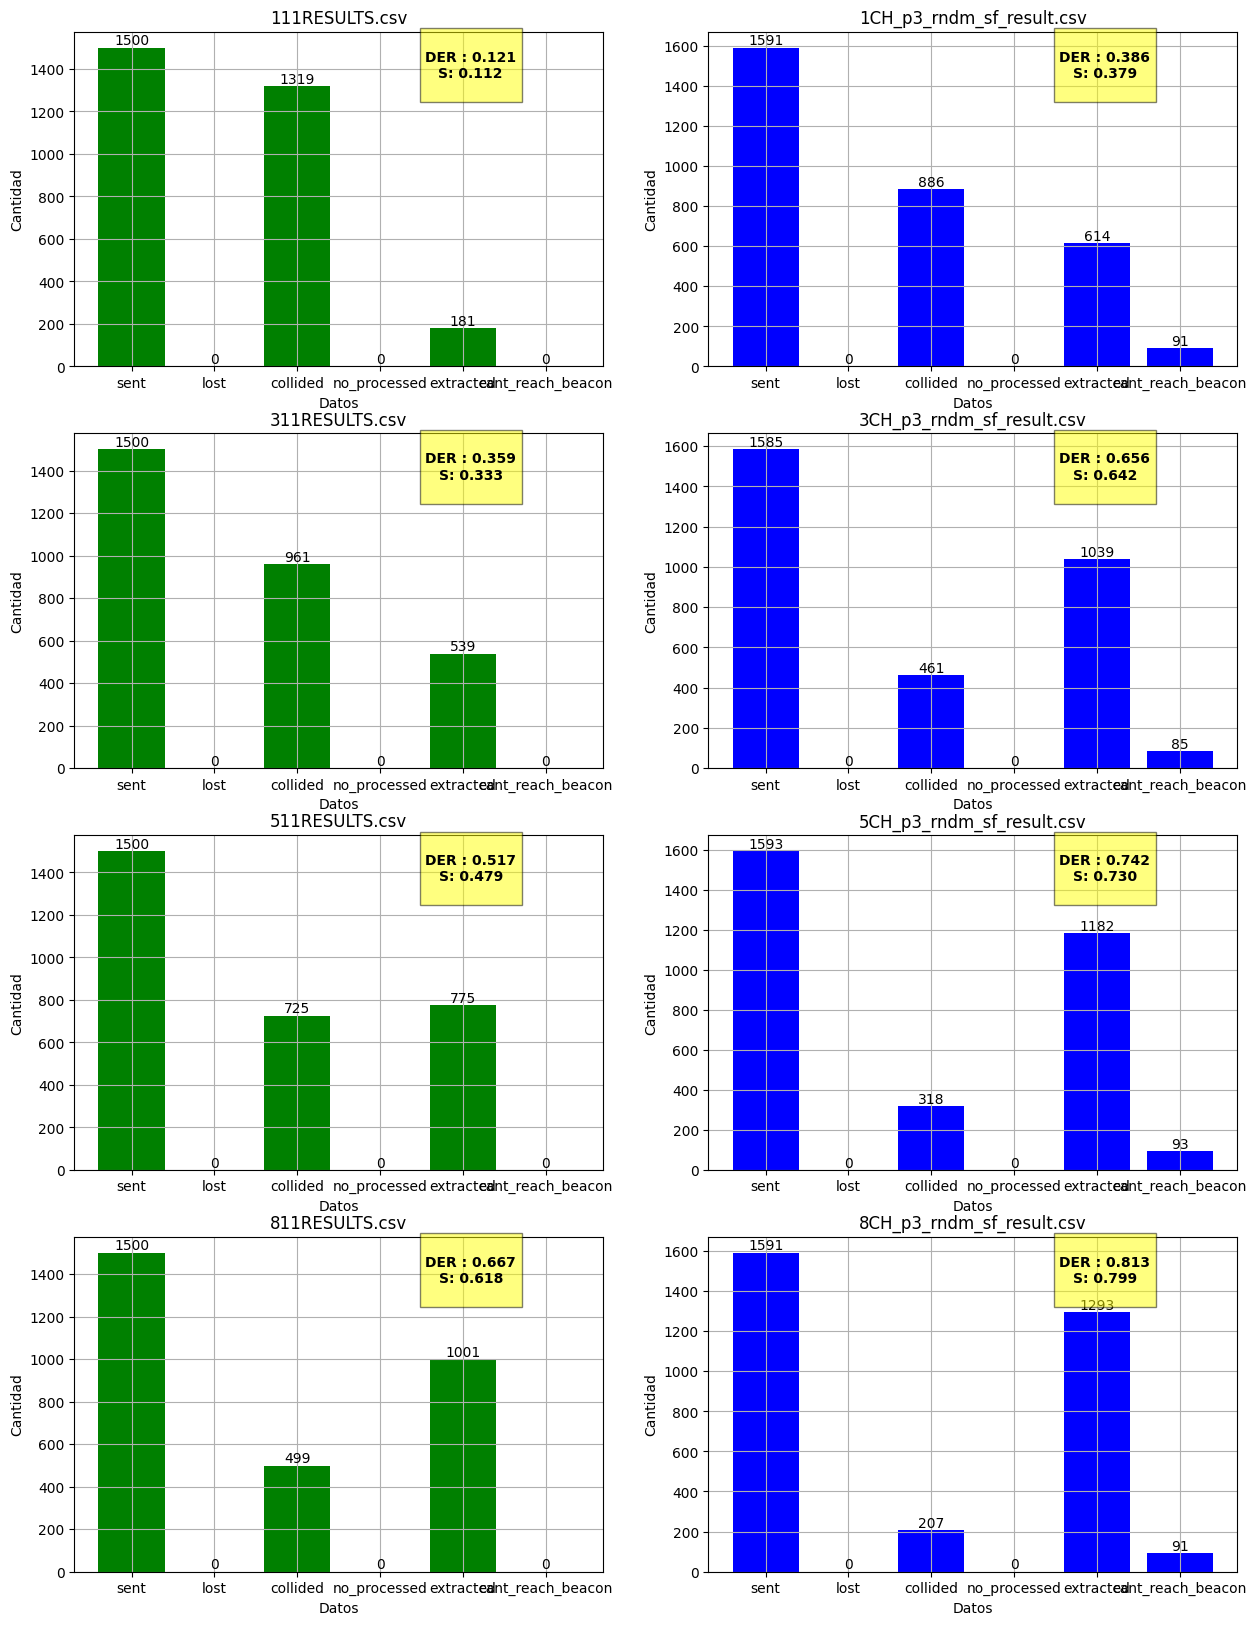

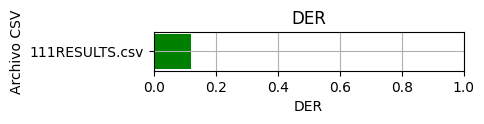

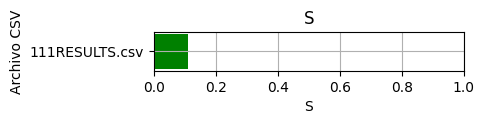

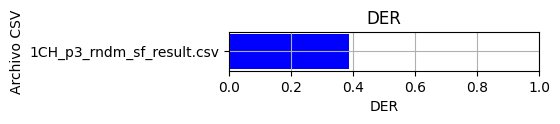

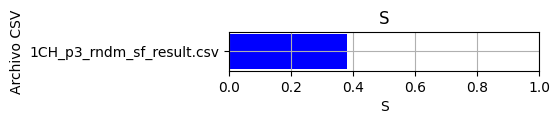

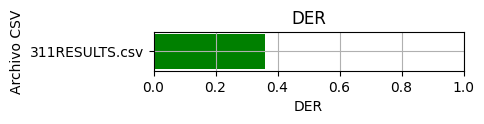

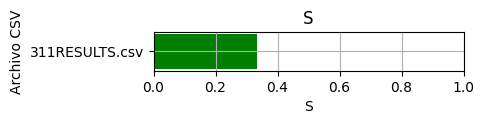

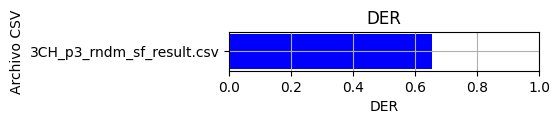

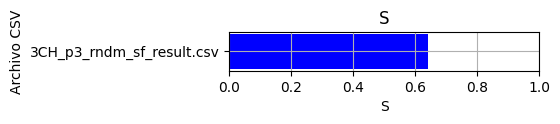

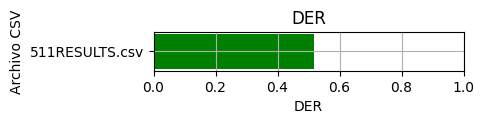

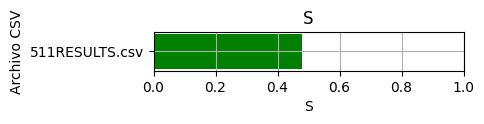

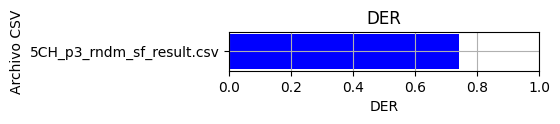

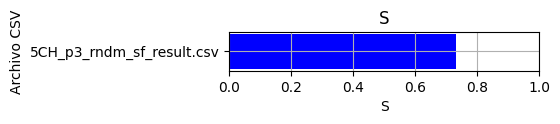

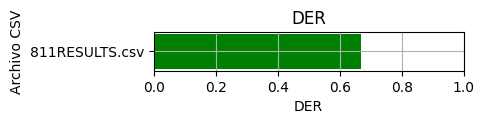

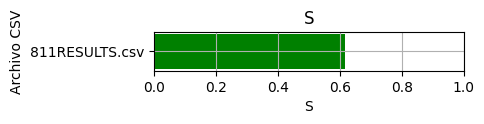

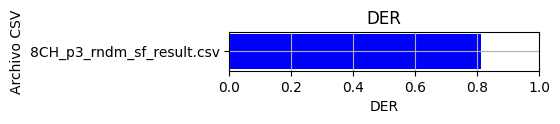

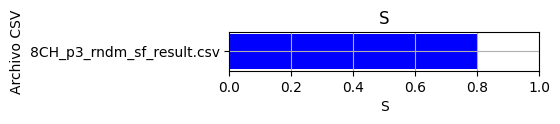

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def procesar_y_graficar(ax, nombre_archivo_resultados, color):
    # Crear DataFrames a partir del archivo CSV, excluyendo la última fila y las columnas no numéricas
    columnas_numericas = ["sent", "lost", "collided", "no_processed", "extracted", "cant_reach_beacon"]
    columna_porcen = ["percentage_extracted"]

    df_resultados = pd.read_csv(nombre_archivo_resultados)
    df_porcen = df_resultados[columna_porcen].apply(pd.to_numeric, errors='coerce')
    df_resultados = df_resultados[columnas_numericas].apply(pd.to_numeric, errors='coerce')

    # Calcular promedios y mostrar diccionario de promedios
    promedios_dict = {columna: round(promedio) for columna, promedio in zip(df_resultados.columns, df_resultados.mean())}
    promedios_porcen = {col_porcen: prom_porcen for col_porcen, prom_porcen in zip(df_porcen.columns, df_porcen.mean())}

    # Visualización gráfica
    bars = ax.bar(promedios_dict.keys(), promedios_dict.values(), color=color)
    ax.bar_label(bars, label_type='edge', color='black', fontsize=10)
    promedio_percentage_extracted = promedios_porcen["percentage_extracted"]
    ax.set_title(f'{nombre_archivo_resultados}')
    ax.set_xlabel('Datos')
    ax.set_ylabel('Cantidad')
    ax.grid(True)

    # Estadísticas adicionales
    der_sim = promedios_dict["extracted"] / promedios_dict["sent"]
    S_sim = (promedios_dict["extracted"] * 0.741376) / 1200

    stats_text = (
        f"\nDER : {der_sim:.3f}\n"
        f"S: {S_sim:.3f}\n"
    )
    ax.text(0.75, 0.9, stats_text, ha='center', va='center', transform=ax.transAxes, bbox=dict(facecolor='yellow', alpha=0.5), fontweight='bold')

    # Crear figuras para los gráficos horizontales para DER y S con tamaños más pequeños
    fig_der, ax_der = plt.subplots(figsize=(4, 0.5))  # Ajustar el tamaño aquí
    fig_s, ax_s = plt.subplots(figsize=(4, 0.5))    # Ajustar el tamaño aquí

    # Graficar barras horizontales para DER
    ax_der.barh([nombre_archivo_resultados], der_sim, color=color)
    ax_der.set_xlim(0, 1)
    ax_der.set_title('DER')
    ax_der.set_xlabel('DER')
    ax_der.set_ylabel('Archivo CSV')
    ax_der.grid(True)

    # Mostrar el gráfico horizontal para DER y su valor
    fig_der.show()

    # Graficar barras horizontales para S
    ax_s.barh([nombre_archivo_resultados], S_sim, color=color)
    ax_s.set_xlim(0, 1)
    ax_s.set_title('S')
    ax_s.set_xlabel('S')
    ax_s.set_ylabel('Archivo CSV')
    ax_s.grid(True)

    # Mostrar el gráfico horizontal para S y su valor
    fig_s.show()

# Nombre de los archivos de resultados
archivos_resultados = ["111RESULTS.csv", "1CH_p3_rndm_sf_result.csv", "311RESULTS.csv", "3CH_p3_rndm_sf_result.csv",
                       "511RESULTS.csv", "5CH_p3_rndm_sf_result.csv", "811RESULTS.csv", "8CH_p3_rndm_sf_result.csv"]

# Configurar subplots para gráficos de barras
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Procesar y graficar cada archivo
for i, archivo in enumerate(archivos_resultados):
    color = 'green' if i % 2 == 0 else 'blue'
    procesar_y_graficar(axs[i // 2, i % 2], archivo, color)

plt.tight_layout()
plt.show()




C:\Users\GoodGame\AppData\Local\Temp\ipykernel_20228\4176529425.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_der.show()
C:\Users\GoodGame\AppData\Local\Temp\ipykernel_20228\4176529425.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_s.show()
C:\Users\GoodGame\AppData\Local\Temp\ipykernel_20228\4176529425.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_der.show()
C:\Users\GoodGame\AppData\Local\Temp\ipykernel_20228\4176529425.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_s.show()
C:\Users\GoodGame\AppData\Local\Temp\ipykernel_20228\4176529425.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_der.show()
C:\Users\GoodGame\AppData\Local\Temp\ipykernel_20228\4176529425.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_s.show()
C:\Users\GoodGame\AppData\Local\Te

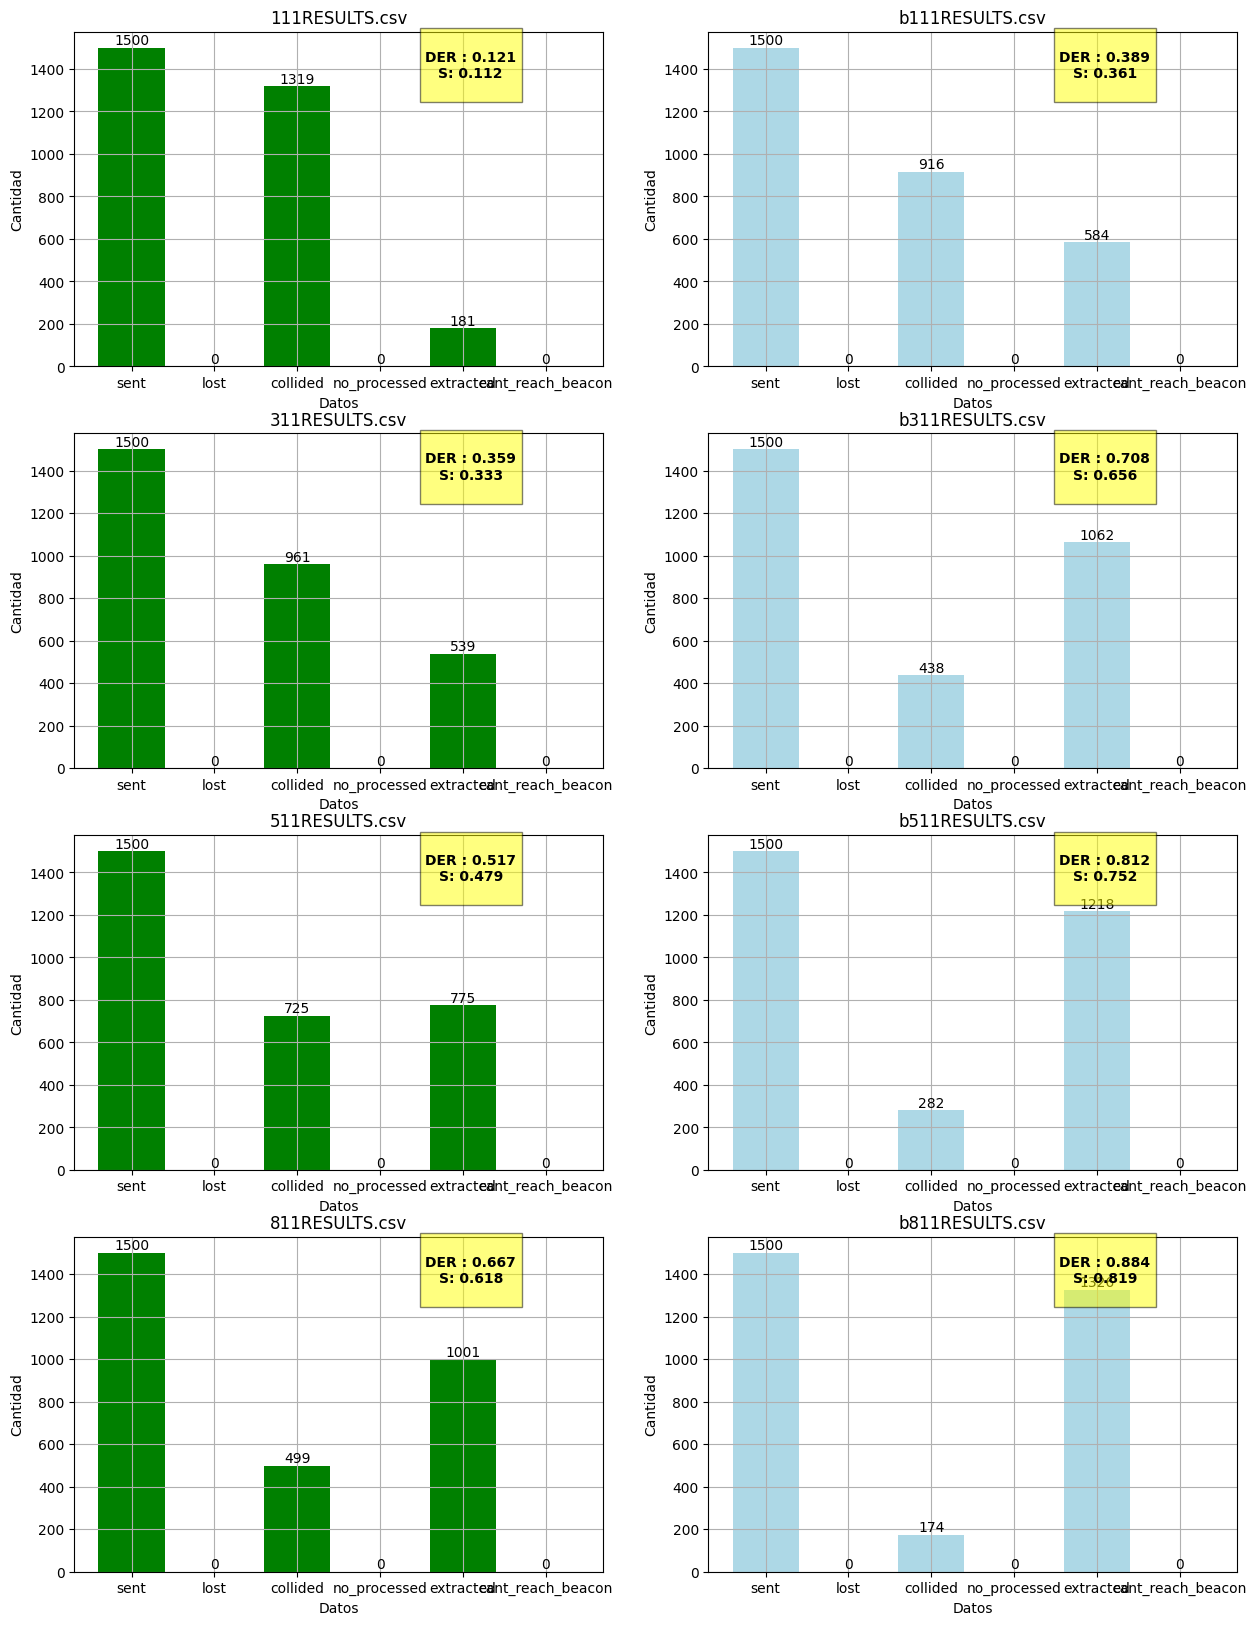

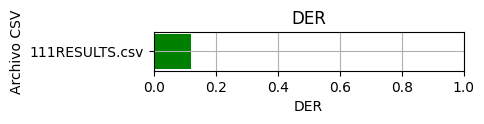

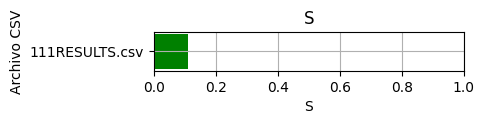

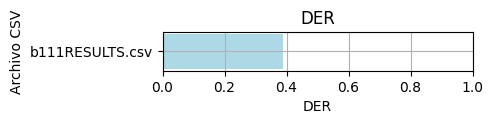

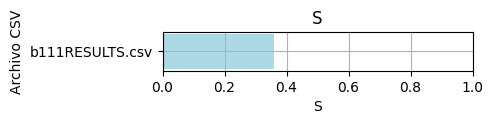

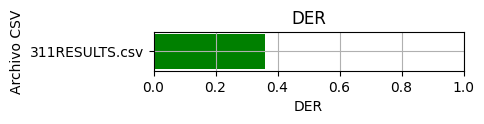

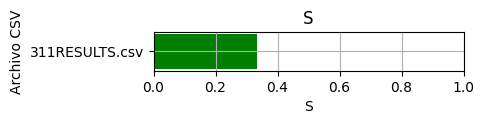

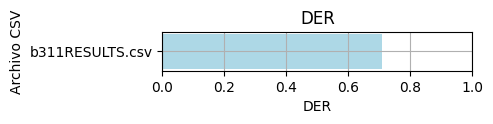

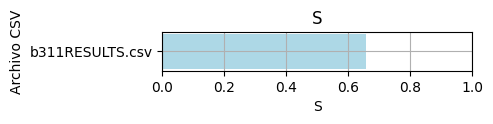

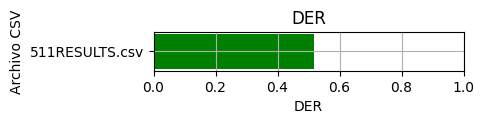

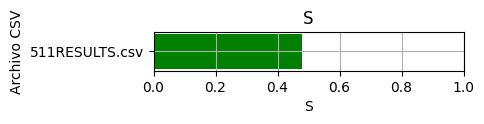

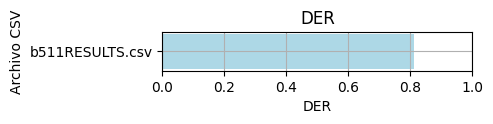

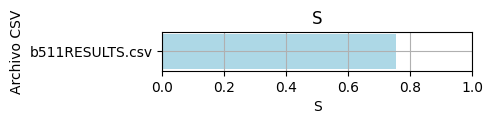

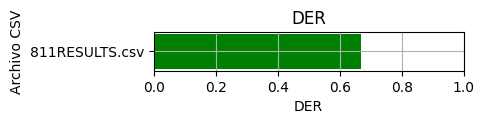

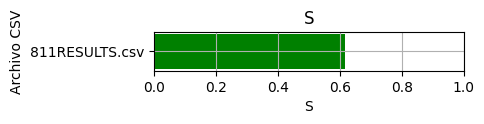

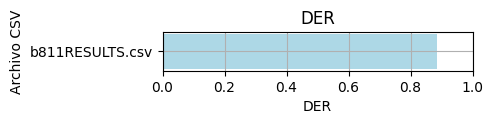

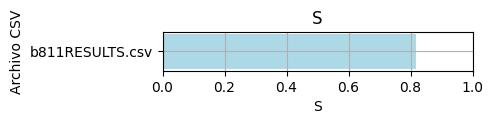

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def procesar_y_graficar(ax, nombre_archivo_resultados, color):
    # Crear DataFrames a partir del archivo CSV, excluyendo la última fila y las columnas no numéricas
    columnas_numericas = ["sent", "lost", "collided", "no_processed", "extracted", "cant_reach_beacon"]
    columna_porcen = ["percentage_extracted"]

    df_resultados = pd.read_csv(nombre_archivo_resultados)
    df_porcen = df_resultados[columna_porcen].apply(pd.to_numeric, errors='coerce')
    df_resultados = df_resultados[columnas_numericas].apply(pd.to_numeric, errors='coerce')

    # Calcular promedios y mostrar diccionario de promedios
    promedios_dict = {columna: round(promedio) for columna, promedio in zip(df_resultados.columns, df_resultados.mean())}
    promedios_porcen = {col_porcen: prom_porcen for col_porcen, prom_porcen in zip(df_porcen.columns, df_porcen.mean())}

    # Visualización gráfica
    bars = ax.bar(promedios_dict.keys(), promedios_dict.values(), color=color)
    ax.bar_label(bars, label_type='edge', color='black', fontsize=10)
    promedio_percentage_extracted = promedios_porcen["percentage_extracted"]
    ax.set_title(f'{nombre_archivo_resultados}')
    ax.set_xlabel('Datos')
    ax.set_ylabel('Cantidad')
    ax.grid(True)

    # Estadísticas adicionales
    der_sim = promedios_dict["extracted"] / promedios_dict["sent"]
    S_sim = (promedios_dict["extracted"] * 0.741376) / 1200

    stats_text = (
        f"\nDER : {der_sim:.3f}\n"
        f"S: {S_sim:.3f}\n"
    )
    ax.text(0.75, 0.9, stats_text, ha='center', va='center', transform=ax.transAxes, bbox=dict(facecolor='yellow', alpha=0.5), fontweight='bold')

    # Crear figuras para los gráficos horizontales para DER y S con tamaños más pequeños
    fig_der, ax_der = plt.subplots(figsize=(4, 0.5))  # Ajustar el tamaño aquí
    fig_s, ax_s = plt.subplots(figsize=(4, 0.5))    # Ajustar el tamaño aquí

    # Graficar barras horizontales para DER
    ax_der.barh([nombre_archivo_resultados], der_sim, color=color)
    ax_der.set_xlim(0, 1)
    ax_der.set_title('DER')
    ax_der.set_xlabel('DER')
    ax_der.set_ylabel('Archivo CSV')
    ax_der.grid(True)

    # Mostrar el gráfico horizontal para DER y su valor
    fig_der.show()

    # Graficar barras horizontales para S
    ax_s.barh([nombre_archivo_resultados], S_sim, color=color)
    ax_s.set_xlim(0, 1)
    ax_s.set_title('S')
    ax_s.set_xlabel('S')
    ax_s.set_ylabel('Archivo CSV')
    ax_s.grid(True)

    # Mostrar el gráfico horizontal para S y su valor
    fig_s.show()

# Nombre de los archivos de resultados
archivos_resultados = ["prueba-pre.csv", "b111RESULTS.csv","311RESULTS.csv","b311RESULTS.csv","511RESULTS.csv","b511RESULTS.csv","811RESULTS.csv","b811RESULTS.csv"]

# Configurar subplots para gráficos de barras
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Procesar y graficar cada archivo
for i, archivo in enumerate(archivos_resultados):
    color = 'green' if i % 2 == 0 else 'lightblue'
    procesar_y_graficar(axs[i // 2, i % 2], archivo, color)

plt.tight_layout()
plt.show()

